In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib import cm
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# only get Data Analyst jobs from germany
df_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy().dropna(subset='salary_year_avg')

df_da = df_da.explode('job_skills')
df_group = df_da.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [21]:
df_top_salary = df_group.sort_values(by= 'median', ascending= False).head(10)
df_top_count = df_group.sort_values(by='count', ascending=False).head(10).sort_values(by= 'median', ascending= False).head(10)

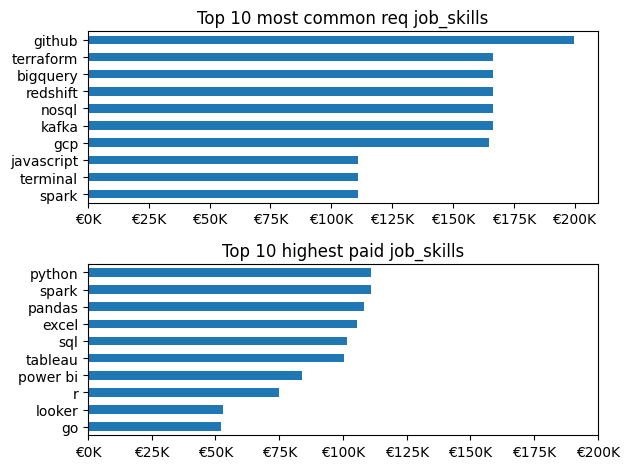

In [36]:
fig, ax = plt.subplots(2,1)

df_top_salary[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 most common req job_skills')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x/1000)}K'))

df_top_count[::-1].plot(kind='barh', y='median', ax=ax[1], legend = False)
ax[1].set_title('Top 10 highest paid job_skills')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xlim(0,200000)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x/1000)}K'))

fig.tight_layout()
